# Import Libraries

In [104]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

# Load Data

### Import Load Data Functions

In [105]:
from LoadData import *

### Load Data and Preprocess

In [106]:
# load images
train_images, train_labels = load_data('training-a', 'training-a.csv')
train_images, train_labels = preprocess_data(train_images, train_labels)

# print shapes
print("train_images.shape = ", train_images.shape)
print("train_labels.shape = ", train_labels.shape)
print("train_images[0].shape = ", train_images[0].shape)

train_images.shape =  (2000, 28, 28, 1)
train_labels.shape =  (2000,)
train_images[0].shape =  (28, 28, 1)


### Split data into train and validation

In [107]:
# split data into train and validation
train_ratio = 0.8
X_train = train_images[:int(train_ratio*len(train_images))]
y_train = train_labels[:int(train_ratio*len(train_labels))]
X_val = train_images[int(train_ratio*len(train_images)):]
y_val = train_labels[int(train_ratio*len(train_labels)):]

# Model

### Import Layers

In [108]:
from ConvolutionLayer import ConvolutionLayer
from ReLULayer import ReLULayer
from MaxPoolingLayer import MaxPoolingLayer
from FlattenLayer import FlattenLayer
from FullyConnectedLayer import FullyConnectedLayer
from SoftmaxLayer import SoftmaxLayer

### Import Model Class

In [109]:
from Model import Model

### Model Building

In [110]:
# use lenet-5 model
model = Model(10)
model.add(ConvolutionLayer(6, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(ConvolutionLayer(16, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(FlattenLayer())
model.add(FullyConnectedLayer(output_size=120))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=84))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=10))
model.add(SoftmaxLayer())

### Train Model

In [111]:
# train
model.train(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, learning_rate=0.0000008, epochs=10, batch_size=128)

epoch:  0
y_pred (first 10)	:  [7 7 7 7 7 7 7 9 9 9]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.075
epoch:  1
y_pred (first 10)	:  [4 7 7 7 7 7 7 9 9 9]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.1225
epoch:  2
y_pred (first 10)	:  [4 7 7 7 8 8 8 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.1
epoch:  3
y_pred (first 10)	:  [4 7 7 7 4 4 4 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.1525
epoch:  4
y_pred (first 10)	:  [4 7 7 7 8 8 8 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.1075
epoch:  5
y_pred (first 10)	:  [4 7 7 7 7 7 7 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.13
epoch:  6
y_pred (first 10)	:  [4 7 7 7 4 4 4 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.1675
epoch:  7
y_pred (first 10)	:  [4 7 7 7 4 4 4 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]
accuracy:  0.175
epoch:  8
y_pred (first 10)	:  [4 7 7 7 4 4 4 4 4 4]
y_real (first 10)	:  [4 6 6 6 6 6 6 5 5 5]

### Save Model

In [112]:
# Save the model using pickle
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model using pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


## Performace Metrics and Confusion Matrix

### Load Test Data

In [113]:
# load test images
test_images, test_labels = load_data('training-d', 'training-d.csv')
test_images, test_labels = preprocess_data(test_images, test_labels)

### Performance Matrics

In [114]:
# performance metrics and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict   
y_pred = model.predict(test_images)

# print performance metrics
print("Accuracy: ", accuracy_score(test_labels, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_labels, y_pred))

# print classification report
print("Classification Report: ", classification_report(test_labels, y_pred))

Accuracy:  0.166
Confusion Matrix:  [[66 48 12 18 18 10  9  8  5 10]
 [27 29 26 31  8 16 16 23  4 12]
 [34 22 24 35 22 10 18  9  4 18]
 [27  5  9 50 24 13 45 22  9  4]
 [17 15  1 48 47 12 31 18 18  1]
 [33 10  3 56 14  8 23 26  7  8]
 [37 12  6 41 26 18 22 14 11 13]
 [43  3  0 60 19  7 19 30  5 18]
 [10  7  3 32 25 19 35 16 30  3]
 [35 17 19 35 12 22 24 28  2 26]]
Classification Report:                precision    recall  f1-score   support

           0       0.20      0.32      0.25       204
           1       0.17      0.15      0.16       192
           2       0.23      0.12      0.16       196
           3       0.12      0.24      0.16       208
           4       0.22      0.23      0.22       208
           5       0.06      0.04      0.05       188
           6       0.09      0.11      0.10       200
           7       0.15      0.15      0.15       204
           8       0.32      0.17      0.22       180
           9       0.23      0.12      0.16       220

    accuracy 

### Confustion Matrix

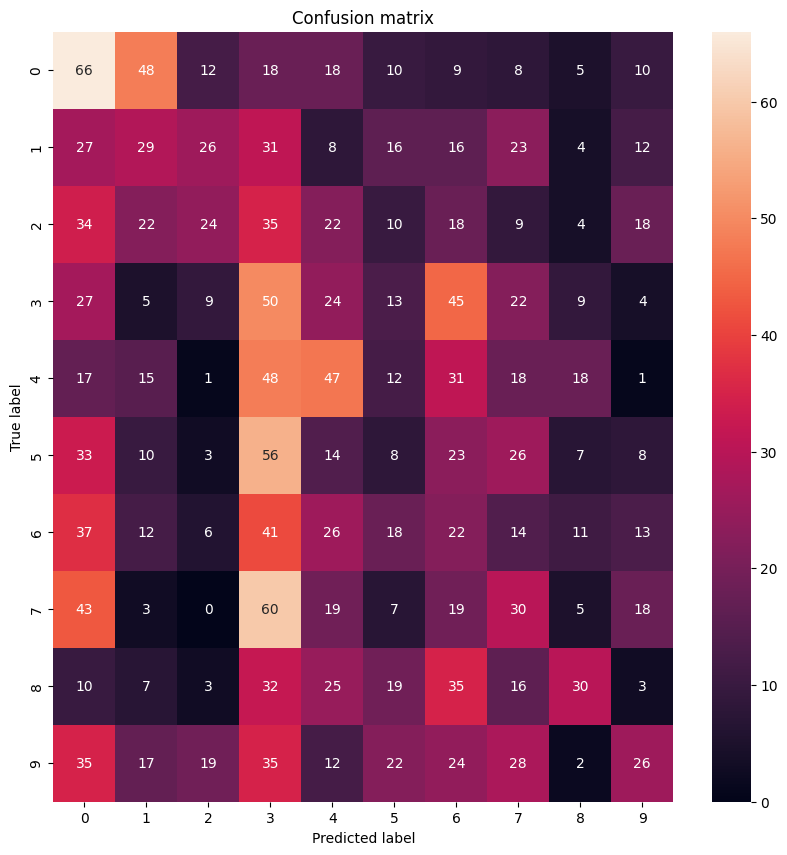

In [115]:
# plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()